<a href="https://colab.research.google.com/github/joaovictordds/Segmentacao_de_clientes/blob/main/modelos_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Escreva vários algoritmos de Agrupamento ou clusterização.
* Contabilize a Performance do Modelo de Machine Learning e transforme em Performance de Negócio.
* Desenvolva uma API que retorne um “Score de Cluster” para cada cliente, indicando à qual cluster ele pertence.
* Crie um README sobre como interpretar e usar a sua solução.
* Escreva um Relatório, respondendo às perguntas de negócio.

In [159]:
import pandas as pd
dados = pd.read_csv('dataprep.csv')
dados.drop(columns='Unnamed: 0', inplace=True)
dados.head(5)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34


In [10]:
# Importando bilbiotecas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Modelo I

Segmentando clientes por volume de vendas

In [164]:
# Criando um dataset agrupando as vendas por cliente e algumas estatisticas
var = dados.groupby('IdCliente').agg({'ValorTotal': ['mean','sum','max']})
clientes = pd.DataFrame(var)
clientes.columns = ['Mean', 'Sum','Max']
clientes.head(6)

,Mean,Sum,Max
IdCliente,,,
12347,23.681319,4310.00,249.6
12348,57.975484,1797.24,240.0
12349,24.076027,1757.55,300.0
12350,19.670588,334.40,40.0
12352,29.482824,2506.04,376.5
12353,22.250000,89.00,39.8


In [162]:
dados[dados['IdCliente'] == 12347]['ValorTotal'].sum()

4310.000000000001

In [165]:
# Passando os dados dos clientes para o formato de matriz
clientes1 = clientes.values
clientes1

array([[2.36813187e+01, 4.31000000e+03, 2.49600000e+02],
       [5.79754839e+01, 1.79724000e+03, 2.40000000e+02],
       [2.40760274e+01, 1.75755000e+03, 3.00000000e+02],
       ...,
       [1.48375000e+01, 1.78050000e+02, 2.55000000e+01],
       [2.77100529e+00, 2.09488000e+03, 2.08000000e+01],
       [2.62468571e+01, 1.83728000e+03, 8.70000000e+01]])

In [166]:
# Escalonando os dados
sc = StandardScaler()
matriz = sc.fit_transform(clientes1)
matriz

array([[-0.09507267,  0.28259252,  0.57971908],
       [ 0.28768065, -0.01984441,  0.53869287],
       [-0.09066737, -0.02462151,  0.79510666],
       ...,
       [-0.19377754, -0.21473085, -0.37798642],
       [-0.32845033,  0.01597968, -0.39807216],
       [-0.06643898, -0.01502517, -0.11516228]])

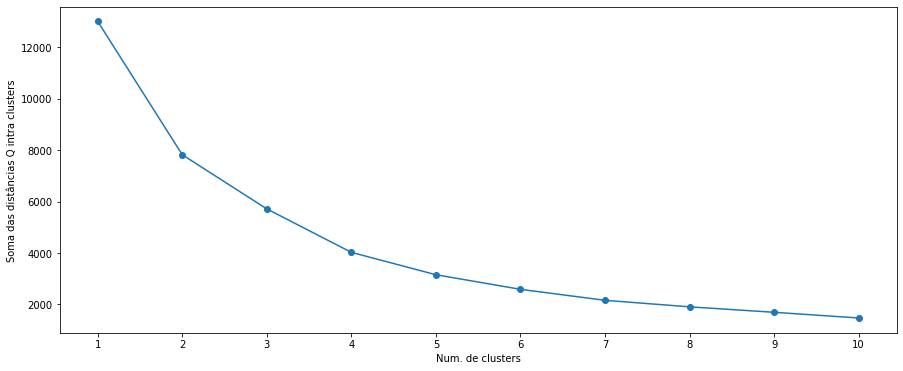

In [167]:
# Escolhendo o numero de clusters pelo método Elbow utilizando K-Means

ks = range(1, 11)
inertia = [] # inertia: Soma das distâncias quadráticas intra cluster

for k in ks:
    # Criando um modelo KMeans com k clusters:
    model = KMeans(n_clusters= k)
    
    # Fitando os dados no modelo
    model.fit(matriz)
    
    # Adicionado os resultados da inertia na sua lista
    inertia.append(model.inertia_)
    
# Gráfico Elbow
plt.figure(figsize=(15,6))
plt.plot(ks, inertia, '-o')
plt.xlabel('Num. de clusters')
plt.ylabel('Soma das distâncias Q intra clusters')
plt.xticks(ks)
plt.show()

In [168]:
#Criando um modelo
modelo = KMeans(n_clusters=4)
modelo.fit(matriz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [170]:
# Adicionando os clusters na tabela de clientes
clientes['Categoria'] = modelo.predict(matriz)
clientes.head()

,Mean,Sum,Max,Categoria
IdCliente,,,,
12347,23.681319,4310.00,249.6,0
12348,57.975484,1797.24,240.0,0
12349,24.076027,1757.55,300.0,0
12350,19.670588,334.40,40.0,0
12352,29.482824,2506.04,376.5,0


In [174]:
# Renomeando os clusters
clientes['Categoria'] = clientes['Categoria'].map({0: 'bronze', 2: 'prata', 3: 'ouro', 1:'platina'})

In [175]:
# Grafico
clientes['Categoria'].value_counts()#.plot(kind='barh');

bronze     4217
prata       107
ouro          6
platina       5
Name: Categoria, dtype: int64

In [173]:
clientes[clientes['Categoria'] == 3]

,Mean,Sum,Max,Categoria
IdCliente,,,,
12415,174.950322,124914.53,1718.40,3
14156,83.842593,117379.63,2365.20,3
14646,132.633263,275214.02,2577.60,3
14911,25.343623,143825.06,1687.17,3
17450,528.042252,175838.07,3272.40,3
18102,594.951860,255829.30,3285.00,3


Os clientes platinados são os com as maiores **médias** de valor de faturamento.

### Modelo II

Segmentando os clientes de acordo com o volume de venda

In [136]:
import pandas as pd
dados = pd.read_csv('dataprep.csv')
dados.drop(columns='Unnamed: 0', inplace=True)
dados.head(3)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00


In [139]:
# Criando um dataset agrupando as vendas por cliente e algumas estatisticas
var = dados.groupby('IdCliente').agg({'Qtde': ['mean','sum','max']})
clientes = pd.DataFrame(var)
clientes.columns = ['Mean', 'Sum','Max']
clientes.head(6)

,Mean,Sum,Max
IdCliente,,,
12347,13.505495,2458,240
12348,75.516129,2341,144
12349,8.643836,631,36
12350,11.588235,197,24
12352,6.305882,536,16
12353,5.000000,20,8


In [140]:
# Passando os dados dos clientes para o formato de matriz
matriz = clientes.values
matriz

array([[1.35054945e+01, 2.45800000e+03, 2.40000000e+02],
       [7.55161290e+01, 2.34100000e+03, 1.44000000e+02],
       [8.64383562e+00, 6.31000000e+02, 3.60000000e+01],
       ...,
       [8.58333333e+00, 1.03000000e+02, 4.80000000e+01],
       [1.84788360e+00, 1.39700000e+03, 1.30000000e+01],
       [2.26571429e+01, 1.58600000e+03, 6.00000000e+01]])

In [141]:
# Escalonando os dados
sc = StandardScaler()
matriz = sc.fit_transform(matriz)
matriz

array([[-0.08575126,  0.28041615,  1.01415991],
       [ 0.84145757,  0.25551147,  0.41726368],
       [-0.15844481, -0.10848007, -0.25424457],
       ...,
       [-0.15934947, -0.22087044, -0.17963255],
       [-0.26006072,  0.05457111, -0.39725096],
       [ 0.05108799,  0.09480175, -0.10502052]])

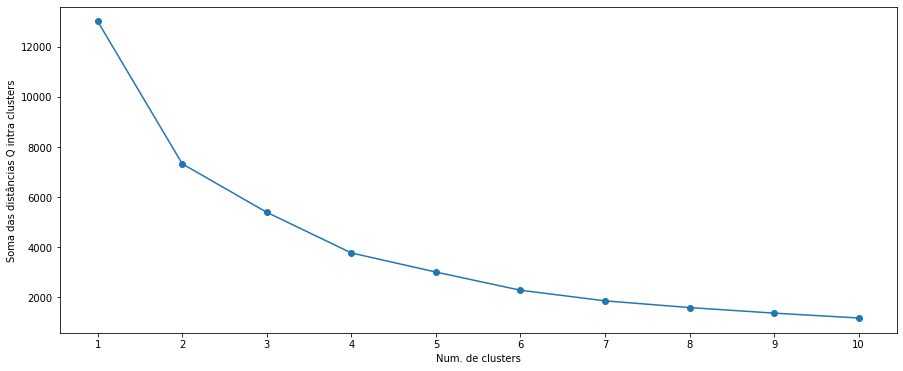

In [142]:
# Escolhendo o numero de clusters pelo método Elbow utilizando K-Means

ks = range(1, 11)
inertia = [] # inertia: Soma das distâncias quadráticas intra cluster

for k in ks:
    # Criando um modelo KMeans com k clusters:
    model = KMeans(n_clusters= k)
    
    # Fitando os dados no modelo
    model.fit(matriz)
    
    # Adicionado os resultados da inertia na sua lista
    inertia.append(model.inertia_)
    
# Gráfico Elbow
plt.figure(figsize=(15,6))
plt.plot(ks, inertia, '-o')
plt.xlabel('Num. de clusters')
plt.ylabel('Soma das distâncias Q intra clusters')
plt.xticks(ks)
plt.show()

In [143]:
#Criando um modelo
modelo = KMeans(n_clusters=4)
modelo.fit(matriz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
# Adicionando os clusters na tabela de clientes
clientes['Categoria'] = modelo.predict(matriz)
clientes.head()

,Mean,Sum,Max,Categoria
IdCliente,,,,
12347,13.505495,2458,240,0
12348,75.516129,2341,144,0
12349,8.643836,631,36,0
12350,11.588235,197,24,0
12352,6.305882,536,16,0


In [157]:
# Renomeando os clusters
clientes['Categoria'] = clientes['Categoria'].map({0: 'bronze', 3: 'prata', 1: 'ouro', 2:'platina'})

In [158]:
# Grafico
clientes['Categoria'].value_counts()#.plot(kind='barh');

bronze     4258
prata        61
ouro         10
platina       6
Name: Categoria, dtype: int64

Os clientes que compram na média um volume elevado de itens são os platinados.

### Modelo III

Segmentando os clientes de acordo com as caracteristicas dos produtos.

In [176]:
dados2 = dados.copy()
dados2['ItemFat']= pd.factorize(dados['Item'])[0] # Renomeando os itens numericamente.
dados2.head(3)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal,ItemFat
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00,2


In [182]:
modelo3 = dados2[['IdCliente','ItemFat','PrecoUnit','Qtde']]
modelo3.head(4)

,IdCliente,ItemFat,PrecoUnit,Qtde
0,17850,0,2.55,6
1,17850,1,3.39,6
2,17850,2,2.75,8
3,17850,3,3.39,6


In [183]:
# Passando os dados dos clientes para o formato de matriz
modelo3m = modelo3.values
modelo3m

array([[1.785e+04, 0.000e+00, 2.550e+00, 6.000e+00],
       [1.785e+04, 1.000e+00, 3.390e+00, 6.000e+00],
       [1.785e+04, 2.000e+00, 2.750e+00, 8.000e+00],
       ...,
       [1.268e+04, 2.925e+03, 4.150e+00, 4.000e+00],
       [1.268e+04, 2.928e+03, 4.150e+00, 4.000e+00],
       [1.268e+04, 2.400e+03, 4.950e+00, 3.000e+00]])

In [184]:
# Escalonando os dados
sc = StandardScaler()
modelo3m = sc.fit_transform(modelo3m)
modelo3m

array([[ 1.49175372, -1.13044773, -0.03680921, -0.17303048],
       [ 1.49175372, -1.12960507,  0.02338694, -0.17303048],
       [ 1.49175372, -1.12876241, -0.02247679, -0.1191982 ],
       ...,
       [-1.52610681,  1.33433447,  0.07785013, -0.22686276],
       [-1.52610681,  1.33686245,  0.07785013, -0.22686276],
       [-1.52610681,  0.89193766,  0.1351798 , -0.2537789 ]])

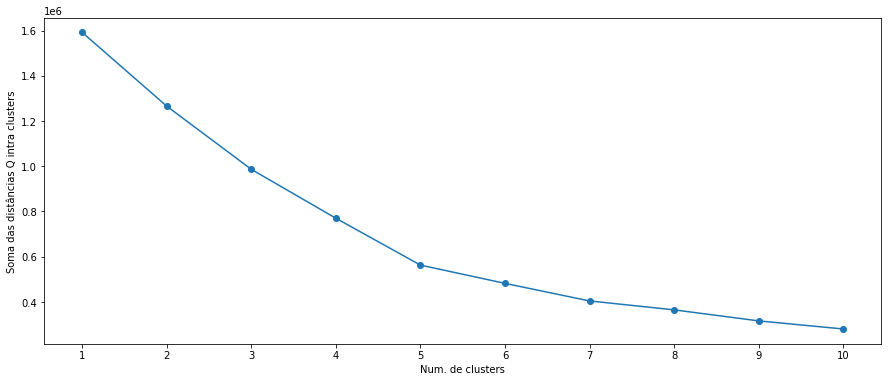

In [185]:
# Escolhendo o numero de clusters pelo método Elbow utilizando K-Means

ks = range(1, 11)
inertia = [] # inertia: Soma das distâncias quadráticas intra cluster

for k in ks:
    # Criando um modelo KMeans com k clusters:
    model = KMeans(n_clusters= k)
    
    # Fitando os dados no modelo
    model.fit(modelo3m)
    
    # Adicionado os resultados da inertia na sua lista
    inertia.append(model.inertia_)
    
# Gráfico Elbow
plt.figure(figsize=(15,6))
plt.plot(ks, inertia, '-o')
plt.xlabel('Num. de clusters')
plt.ylabel('Soma das distâncias Q intra clusters')
plt.xticks(ks)
plt.show()

In [186]:
#Criando um modelo
modelo = KMeans(n_clusters=5)
modelo.fit(modelo3m)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [189]:
# Adicionando os clusters na tabela de clientes
dados2['Categoria'] = modelo.predict(modelo3m)
dados2.head()

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal,ItemFat,Categoria
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30,0,0
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00,2,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,3,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,4,0


In [191]:
dados2['Categoria'].value_counts()

4    151302
0    134517
1    110809
3      1196
2        22
Name: Categoria, dtype: int64

In [193]:
dados2[dados2['Categoria'] == 0]

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal,ItemFat,Categoria
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30,0,0
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00,2,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,3,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397817,581585,22727,ALARM CLOCK BAKELIKE RED,4,2017-12-07,3.75,15804,United Kingdom,2017,12,7,15.00,27,0
397818,581585,16016,LARGE CHINESE STYLE SCISSOR,10,2017-12-07,0.85,15804,United Kingdom,2017,12,7,8.50,466,0
397819,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,2017-12-07,0.42,15804,United Kingdom,2017,12,7,10.08,417,0
397820,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2017-12-07,0.42,15804,United Kingdom,2017,12,7,10.50,685,0


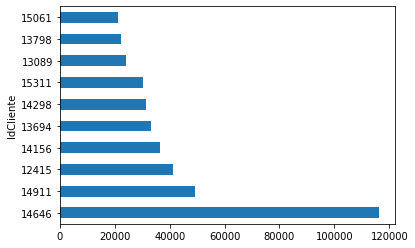

In [194]:
dados2[dados2['Categoria'] == 4].groupby('IdCliente')['Qtde'].sum().sort_values(ascending=False).head(10).plot(kind='barh');

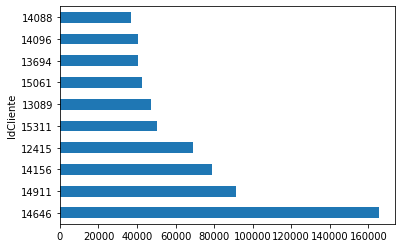

In [195]:
dados2[dados2['Categoria'] == 4].groupby('IdCliente')['ValorTotal'].sum().sort_values(ascending=False).head(10).plot(kind='barh');